In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [3]:
model = tf.keras.models.load_model('plant_disease.keras')

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [5]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 2.6 MB/s eta 0:00:15
   ---------------------------------------- 0.4/38.6 MB 3.6 MB/s eta 0:00:11
   ---------------------------------------- 0.4/38.6 MB 3.6 MB/s eta 0:00:11
   ---------------------------------------- 0.5/38.6 MB 2.2 MB/s eta 0:00:18
    --------------------------------------- 0.6/38.6 MB 2.1 MB/s eta 0:00:18
    --------------------------------------- 0.7/38.6 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.8/38.6 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.9/38.6 MB 2.3 MB/s eta 0:00:17
    --------------------------------------- 0.9/38.6 MB 2.3 MB/s eta 0:00:17
   - -------------------------------------- 1.1/38.6 MB 2.2 MB/s eta 0:00:17
   - -------------------------------------- 1.2/38.6 MB 2.2 MB/s eta 0:00:18
   - --------

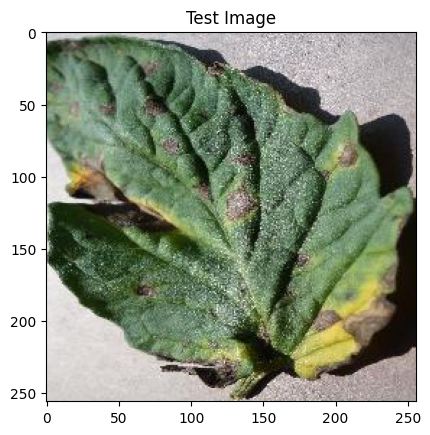

In [8]:
import cv2
image_path= 'test/Tomato___Early_blight/004cbe60-8ff9-4965-92df-e86694d5e9ba___RS_Erly.B 8253.JPG'
img =cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


plt.imshow(img)
plt.title("Test Image")
plt.xticks=([])
plt.yticks=([])
plt.show()

In [10]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr= np.array([input_arr])
print(input_arr.shape)

(1, 128, 128, 3)


In [11]:
prediction=model.predict(input_arr)
prediction, prediction.shape

1/1 [==============================] - 0s 369ms/step


(array([[9.6902308e-10, 5.6762105e-11, 9.6852648e-07, 1.1138092e-03,
         1.1961502e-05, 3.4079972e-12, 9.7770119e-01, 2.1171238e-02,
         5.3590321e-10, 1.4809068e-10, 2.6658762e-12, 7.7329162e-07,
         1.4372417e-11, 4.9237168e-16, 1.3653533e-17]], dtype=float32),
 (1, 15))

In [13]:
result_index=np.argmax(prediction)
result_index

6

In [14]:
class_name= ['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

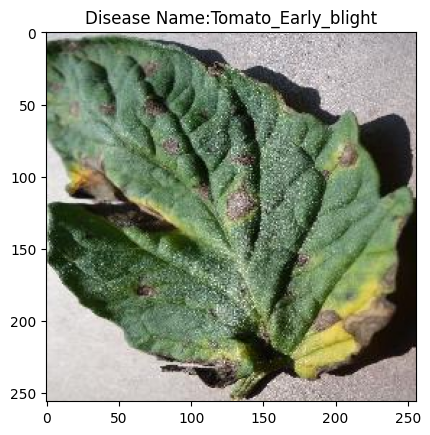

In [18]:
plant_status=class_name[result_index]
plant_status
plt.imshow(img)
plt.title(f"Disease Name:{plant_status}")
plt.xticks=([])
plt.yticks=([])
plt.show()